### Importing Libraries
We’ve been asked to analyze the online ad-click data collected by company owner. His advertising website has generated a dataset to monitors ad clicks across 30 different colors. Our aim is to discover an ad color that generates significantly more clicks than blue. He thinks that blue is a boring color and he wants to use other color. Fortunately, his advertising software allows him to choose from 30 different colors. Is there a text color that will bring more clicks than blue? Let's find out!

In [2]:
 from scipy import stats

In [3]:
 import matplotlib.pyplot as plt

In [4]:
 import numpy as np

In [5]:
 import pandas as pd

In [7]:
 import seaborn as sns

Loading the ad-click table into Pandas

In [53]:
 df = pd.read_csv('Ad_data.csv')

In [54]:
num_rows, num_cols = df.shape

In [55]:
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


### Performing EDA

In [56]:
 print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [57]:
 print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Brown' 'Turquoise' 'Indigo' 'Gold'
 'Jade' 'Blue' 'Ultramarine' 'Yellow' 'Viridian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [58]:
#Checking for blue color and let's analyze whether it is true that blue color yeilds more clicks 
assert 'Blue' in df.Color.values

In [59]:
#Let's analyze first day's data for blue color specifically
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            28.300000              100.0
std              5.831839                0.0
min             18.000000              100.0
25%             25.250000              100.0
50%             28.000000              100.0
75%             31.000000              100.0
max             49.000000              100.0


In [60]:
#After taking the closer look, we have redundant data of views because in every column the views are same i.e. 100 so we can drop this column for analysis
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [61]:
 df.set_index('Color', inplace=True)
 print(df.T.Blue.describe())

count    20.000000
mean     30.350000
std       5.323978
min      24.000000
25%      27.500000
50%      30.500000
75%      32.000000
max      49.000000
Name: Blue, dtype: float64


In [62]:
#Blue color yeilds aroun 30.35% clicks which is pretty good. Let's compare it with other 29 colors.We will create a temp dataframe and remove blue color from it.
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    24    19        28      22     27     21    30      23   
Click Count: Day 2    23    18        26      21     28     20    31      22   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Viridian  Violet  \
Click Count: Day 1    29    32  ...           35      28        31      33   
Click Count: Day 2    30    34  ...           36      29        32      34   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     30          34       32      29      27    26  
Click Count: Day 2     31          35       33      30      28    27  

[2 rows x 29 columns]


### Define a Permutation Function

In [63]:
 def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b) 
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
         np.random.shuffle(total_data)
         sample_a = total_data[:data_array_a.size]
         sample_b = total_data[data_array_a.size:]
         if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff: 
            number_extreme_values += 1
            
    p_value = number_extreme_values / 30000
    return p_value

### Running Permutation

In [64]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(), key=lambda x: x[1]))

### Plot a Heatmap based on the P-Values Returned


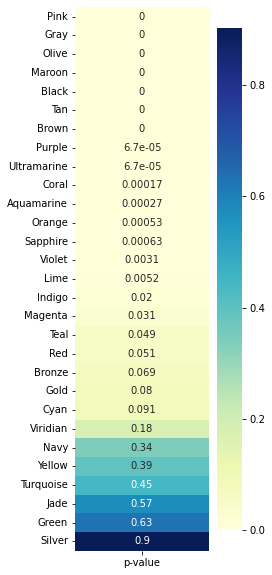

In [65]:
plt.figure(figsize=(3, 10)) 
sns.heatmap([[p_value] for p_value in sorted_p_values], 
    cmap='YlGnBu', annot=True, xticklabels=['p-value'],
    yticklabels=sorted_colors)
plt.show()

In [66]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 18.45


In [68]:
mean_pink = df_not_blue.Pink.mean()
print(f"Mean click-rate of pink is {mean_pink}")

Mean click-rate of pink is 24.45


In [88]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
remaining_means = df.loc[remaining_colors].T.mean()  # Calculate mean click counts for remaining colors
remaining_sorted = remaining_means.sort_values(ascending=False)  # Sort by mean click count
size = remaining_sorted.size

print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_sorted.index.values)


10 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Ultramarine' 'Aquamarine' 'Violet' 'Magenta' 'Gold' 'Cyan'
 'Viridian' 'Turquoise' 'Green']


In [91]:
# If we look at the top 3 color choices based on the mean click we will observe that Sapphire and Ultramarine are both the shade of blue whereas Aquamarine has shades of blue and green both in it. This indicates that blue is still a choice of user for clicking on any link. Let's compare p-values of these colors and recommend a color to the client.
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_sorted:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 6.666666666666667e-05 and a mean of 36.2
Aquamarine has a p-value of 0.0002666666666666667 and a mean of 35.1
Sapphire has a p-value of 0.0006333333333333333 and a mean of 38.55
Violet has a p-value of 0.0031333333333333335 and a mean of 34.1
Magenta has a p-value of 0.030766666666666668 and a mean of 33.1
Gold has a p-value of 0.08003333333333333 and a mean of 32.6
Cyan has a p-value of 0.09063333333333333 and a mean of 32.55
Viridian has a p-value of 0.17803333333333332 and a mean of 32.2
Turquoise has a p-value of 0.4461 and a mean of 31.45
Green has a p-value of 0.6305666666666667 and a mean of 31.1


### Summary & Recommendation
Nine of the colors have large p-values. Only one color has a p-value that’s small. That color is ultramarine: a special shade of blue. Its mean of 36.2 is greater than blue’s mean of 30.35. Ultramarine’s p-value is approx 0.000067.

Conclusion: Let’s consider our two alternative scenarios. In the first scenario, the null hypothesis is true. If that’s the case, then both blue and ultramarine share the same population mean. Under these circumstances,swapping ultramarine for blue will not affect the ad click rate. In the second scenario,the higher ultramarine click rate is actually statistically significant. If that’s the case,then swapping ultramarine for blue will yield more ad clicks. Therefore, client has everything to gain and nothing to lose by setting all his ads to ultramarine.